# Telco Customer Churn Classification Project

## Table of Contents
1. Introduction
2. Data Preprocessing
3. Exploratory Data Analysis
4. Feature Engineering
5. Customer segments Analysis
6. Model Selection and Interpretation 
7. Conclusions

# Introduction

## What is Churn?

Churn is the measure of how many customers stop using a product. It would be nice to learn how to identify those customers who may leave your service. In this case, we will be able to build processes in such a way as to retain these customers.

By analyzing churn, you can understand the features of the product that provide the most value for our customers. And to concentrate efforts on these parts of the product.

We can also use churn data to understand the demand for our product among different segments of potential customers.

A focus on retention of customers is a key both for a product management strategy and from a marketing point of view. 
*   Because it's generally more expensive to find new customers than to keep existing ones.

*   And a churn rate only 2% per month can result yearly losses approx. 22% 




## Goal of the project

This project aims to understand which factors influence a customer to churn, to try to prevent the loss of customers. And to define which segments of customers choose rather to churn or to stay.

## Data

The Telco customer churn data contains information about a fictional company that provided phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. 
The data set is separated to several files with information about:

*   Demographics: include gender, dependents, family status, etc., 
*   Churn Data: indicates whether or not the customer left within the last month,
*   Information about the types of services each customer has, monthly and total charges.



**Source:** https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## Business value

*   Findings on types of services that correlates negatively with a decision to Churn can support us on developing of those services.
*   Findings on types of customer segments that correlates negatively with a decision to Churn can help us to find the new growth opportunities.  
*   Creation of a model that can predict potential customers who want to churn can help us target on them with our retention promotion.





# Data Preprocessing

At first we need to download 3 xlsx files provided with this notebook: 

*   Telco_customer_churn_status.xlsx
*   Telco_customer_churn_demographics.xlsx
*   Telco_customer_churn_services.xlsx

All files should be located in the same folder. You shouldn't change their names.
We need to create a data set that combines columns about the demographic characteristics, services and the Churn Label column that indicates whether or not the customer left within the last month.


In [113]:
# Let's import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Our data is in xlsx format. We can open them or transform to csv file. I decided to transform xlsx to csv file. Then we merge the data that we need and save a df to a new csv file called 'Churn  prediction project.csv'.

In [ ]:
# Let's create a function that transforms xlsx files to csv
def xlsx_to_csv(xlsx_file_name = 'Telco_customer_churn_status.xlsx') -> str:
    data_xls = pd.read_excel(xlsx_file_name, index_col=None)
    csv_file_name = xlsx_file_name[6:-4]+'csv'
    data_xls.to_csv(csv_file_name, encoding='utf-8', index=False)
    return csv_file_name

In [ ]:
# We explore the first data set with churn status info
churn_status_file = xlsx_to_csv('Telco_customer_churn_status.xlsx')
churn_status_df = pd.read_csv(churn_status_file)

churn_status_df.head(3)

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer


In [ ]:
# From churn_status_df data set we need the 'Customer ID' and 'Churn Value' columns
df_1 = churn_status_df[['Customer ID', 'Churn Value']]

In [ ]:
# We explore the second data set with demographics info
demographics_file = xlsx_to_csv('Telco_customer_churn_demographics.xlsx')
demographics_df = pd.read_csv(demographics_file)
demographics_df.head(3)

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3


In [ ]:
# From demographics_df data set we need the 'Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents'  columns
df_2 = demographics_df[['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents']]

In [ ]:
# We explore the third data set with services info
services_file = xlsx_to_csv('Telco_customer_churn_services.xlsx')
services_df = pd.read_csv(services_file)
services_df.head(3)

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88


In [ ]:
# From services_df data set we need the 'Customer ID', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges' 
df_3 = services_df[['Customer ID', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges']]

In [ ]:
# Let's merge the data sets using a key 'Customer ID'
df_1_2 = pd.merge(df_1, df_2, on = "Customer ID")
df = pd.merge(df_1_2, df_3, on = "Customer ID")

#Let's save the df into a csv file
df.to_csv('Churn  prediction project.csv', index = False)

The final data set 'df' contains 7042 rows and 22 columns. The types of columns are correct.
It contains the Churn Value label, demographics, tenure, monthly and total charges, payment info and services. We don't need the Customer Id column anymore. So we drop it. Let's check further the missing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             7043 non-null   object 
 1   Churn Value             7043 non-null   int64  
 2   Gender                  7043 non-null   object 
 3   Under 30                7043 non-null   object 
 4   Senior Citizen          7043 non-null   object 
 5   Married                 7043 non-null   object 
 6   Dependents              7043 non-null   object 
 7   Tenure in Months        7043 non-null   int64  
 8   Phone Service           7043 non-null   object 
 9   Multiple Lines          7043 non-null   object 
 10  Internet Service        7043 non-null   object 
 11  Online Security         7043 non-null   object 
 12  Online Backup           7043 non-null   object 
 13  Device Protection Plan  7043 non-null   object 
 14  Premium Tech Support    7043 non-null   

In [ ]:
# Drop the 'Customer ID' column
df = df.drop(['Customer ID'], axis = 1)
df

,Churn Value,Gender,Under 30,Senior Citizen,Married,Dependents,Tenure in Months,Phone Service,Multiple Lines,Internet Service,...,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges
0,1,Male,No,Yes,No,No,1,No,No,Yes,...,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65
1,1,Female,No,Yes,Yes,Yes,8,Yes,Yes,Yes,...,Yes,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30
2,1,Male,No,Yes,No,Yes,18,Yes,Yes,Yes,...,No,No,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55
3,1,Female,No,Yes,Yes,Yes,25,Yes,No,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50
4,1,Female,No,Yes,Yes,Yes,37,Yes,Yes,Yes,...,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Female,No,No,No,No,72,Yes,No,No,...,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40
7039,0,Male,No,No,Yes,Yes,24,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50
7040,0,Female,No,No,Yes,Yes,72,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90
7041,0,Female,No,No,Yes,Yes,11,No,No,Yes,...,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45


## Missing values check 

We can see, that there are no missing variables, because the number of non-null entries is the same for each column. But let's double-check the percentage of missing values for each column.
Also many columns are categorical, that means we need to convert them to dummy variables later.

In [ ]:
# The percentage of missing values for each column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Customer ID,0,0.0
Churn Value,0,0.0
Monthly Charge,0,0.0
Payment Method,0,0.0
Paperless Billing,0,0.0
Contract,0,0.0
Streaming Movies,0,0.0
Streaming TV,0,0.0
Premium Tech Support,0,0.0
Device Protection Plan,0,0.0


## Outliers check

We can check visually creating a histogram, scatter plot or a box plot: 
*   2 contunious variables : 'Monthly Charge', 'Total Charges'
*   1 discrete var: 'Tenure in Months'

Other variables are categorical, we can check the unique values.

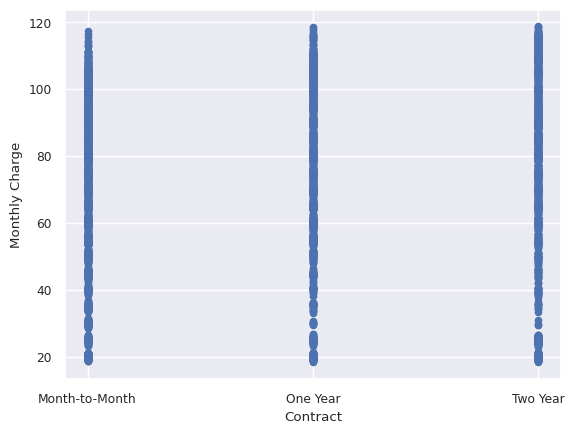

In [ ]:
# Find multivariate outliers of 'Monthly Charge' and 'Contract'
var = 'Contract'
data = pd.concat([df['Monthly Charge'], df[var]], axis=1)
data.plot.scatter(x=var, y='Monthly Charge');

Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data.

<Axes: ylabel='Total Charges'>

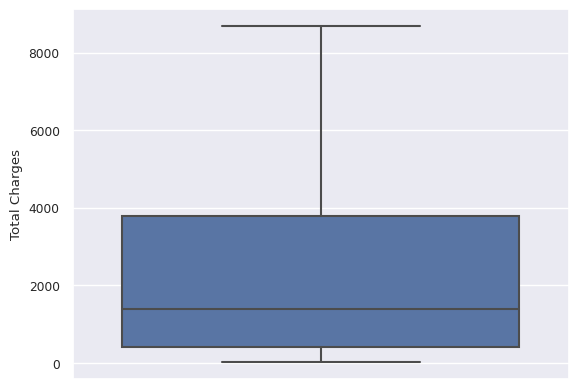

In [ ]:
# Looking for the outliers of Total Charges
sns.boxplot(data=df,y='Total Charges')

Text(0.5, 1.0, 'Histogram of Tenure in Months')

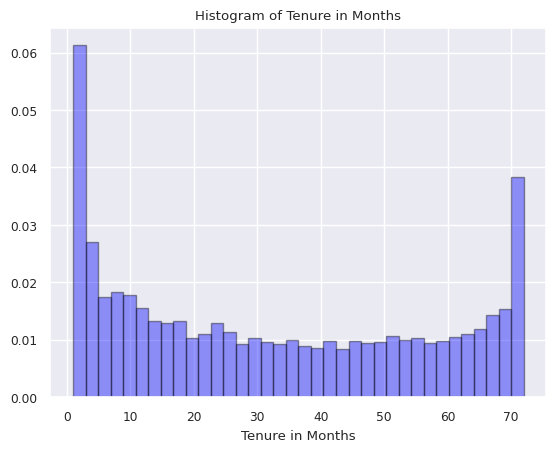

In [ ]:
# Looking for the outliers of 'Tenure in Months' 
sns.distplot(df['Tenure in Months'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',norm_hist = True,
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Tenure in Months')

**There are no outliers for variables: 'Monthly Charge', 'Total Charges', 'Tenure in Months' and Contract'.**

In [ ]:
# Let's check the unique variables for our categorical features
def check_unique (cat_features):
  for x in cat_features:
    if len(df[x].unique()) > 2:
      print("This var " +  x  + " has more than 2 categories. Check it out")

cat_features = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Payment Method']
check_unique(cat_features)

This var Payment Method has more than 2 categories. Check it out


In [ ]:
# Let's check the 'Payment Method' variable
df['Payment Method'].unique()

array(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype=object)

## Summary

What has been revealed:
1. No missing values.
2. No outliers.

# Exploratory Data Analysis

**We need to have a look at our features and a Churn Value variable that we want to predict.**

**Let's have a look at variables:**
'Churn Value' has dichotomic values '0' for those who didn't churn and '1' for those who did churn.
So it doesn't make sense to look at its quantitiles, min, max etc.

Also we can see cohorts of customers whose tenure varies from 1 month to 72 months, that in average our customers are 2,5 years with us (32.39 months).

In [ ]:
# Descriptive statistics summary
df.describe()

,Churn Value,Tenure in Months,Monthly Charge,Total Charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,32.386767,64.761692,2280.381264
std,0.441561,24.542061,30.090047,2266.220462
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,400.150000
50%,0.000000,29.000000,70.350000,1394.550000
75%,1.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


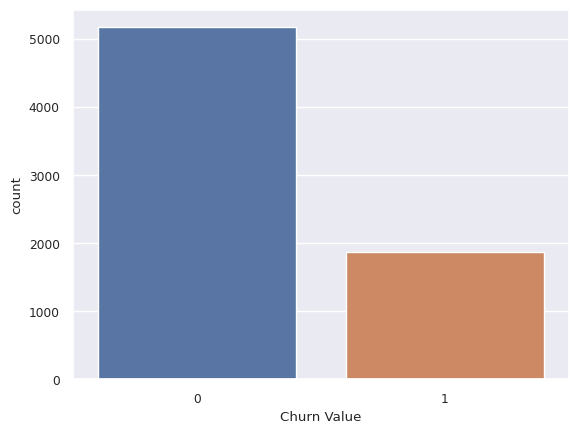

In [ ]:
# '0' did not churn, '1' churned
sns.countplot(x = df['Churn Value']);

([<matplotlib.patches.Wedge at 0x7fbe06fc94e0>,
 [Text(-0.7393678277834757, 0.8144539368428056, '0'),
  Text(0.7393677515287918, -0.8144540060674139, '1')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%\n5174'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%\n1869')])

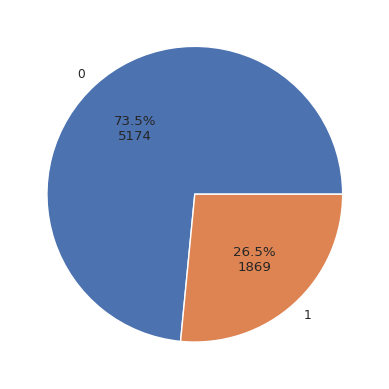

In [ ]:
# Let's have a look on the ratio
total = df['Churn Value'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['Churn Value'].value_counts().values, labels=df['Churn Value'].value_counts().index, autopct=fmt)


Our target variable 'Churn Value' is imbalanced. If the Ratio was more extreme than 80/20, then we had to resample our data set or grow the "Churn Value:1".
We should look at this variable's ratio after a customers segmentation. Also the validation with stratification can be useful during the model's evaluation.

<Axes: xlabel='Churn Value', ylabel='Monthly Charge'>

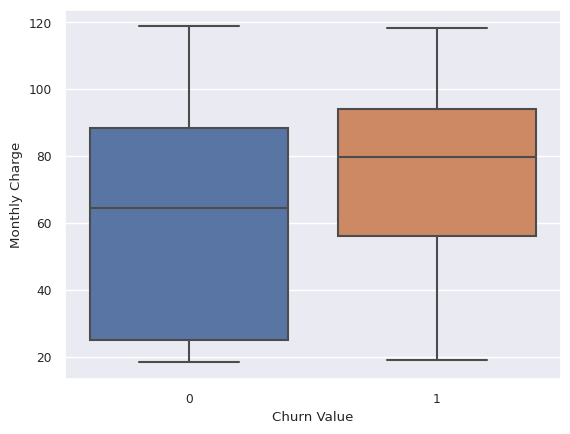

In [75]:
# Monthly charges for churned and not churned
sns.boxplot(data=df,x='Churn Value',y='Monthly Charge')

We see that for those who churned, average Monthly Charges are relatevely higher.

<Axes: xlabel='Contract', ylabel='Monthly Charge'>

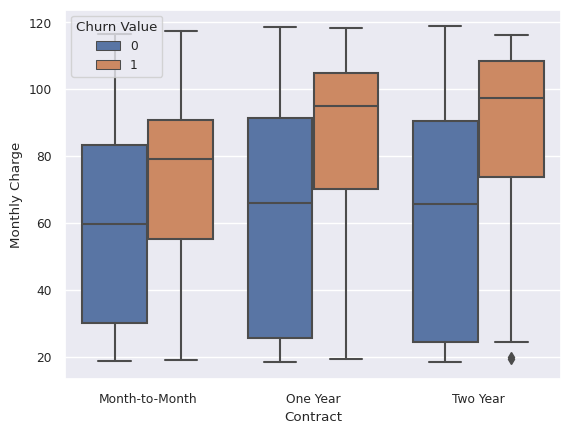

In [77]:
# Monthly charges vs the contract type
sns.boxplot(data=df,y='Monthly Charge', x='Contract',hue='Churn Value')

It is interesting that the charges vary not very different with types of contract.
We should have a look on industry's benchmarks and competitors if they suggest lower monthly charges for the long - term contracts to make them look more appealing.

<Axes: xlabel='Contract', ylabel='Total Charges'>

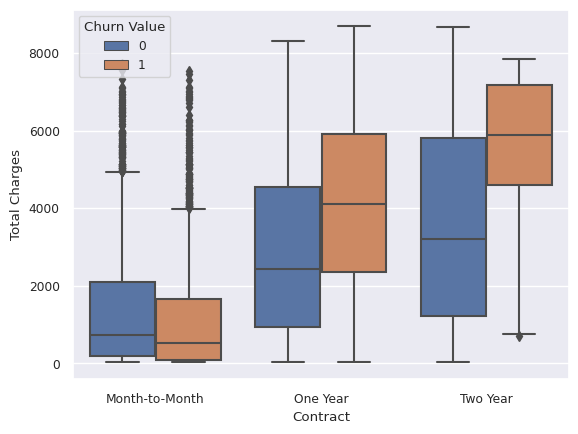

In [79]:
#The total charges for One Year and Two Year contracts are also higher for those who did churn.
sns.boxplot(data=df,y='Total Charges',x='Contract',hue='Churn Value')

## Categorical Variables Encoding

For further data exploration we need to convert the categorical variables into dummy vars

In [80]:
dummy_vars_df = pd.get_dummies(data = df[['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']])
dummy_vars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender_Female                   7043 non-null   uint8
 1   Gender_Male                     7043 non-null   uint8
 2   Under 30_No                     7043 non-null   uint8
 3   Under 30_Yes                    7043 non-null   uint8
 4   Senior Citizen_No               7043 non-null   uint8
 5   Senior Citizen_Yes              7043 non-null   uint8
 6   Married_No                      7043 non-null   uint8
 7   Married_Yes                     7043 non-null   uint8
 8   Dependents_No                   7043 non-null   uint8
 9   Dependents_Yes                  7043 non-null   uint8
 10  Phone Service_No                7043 non-null   uint8
 11  Phone Service_Yes               7043 non-null   uint8
 12  Multiple Lines_No               7043 non-null   uint8
 13  Mul

# Feature Engineering

## Correlations

What features correlate the most with the Churn Value?

In [87]:
# The correlations
corr_df = pd.concat([df[['Churn Value', 'Monthly Charge', 'Total Charges']], dummy_vars_df], axis = 1)
corr_yes_churn = corr_df.corr()['Churn Value'].sort_values().iloc[:-1]

In [88]:
corr_yes_churn

Contract_Two Year                -0.328195
Dependents_Yes                   -0.248542
Internet Service_No              -0.227890
Payment Method_Credit Card       -0.218528
Total Charges                    -0.198546
Paperless Billing_No             -0.191825
Contract_One Year                -0.190418
Online Security_Yes              -0.171226
Premium Tech Support_Yes         -0.164674
Senior Citizen_No                -0.150889
Married_Yes                      -0.150448
Online Backup_Yes                -0.082255
Device Protection Plan_Yes       -0.066160
Streaming TV_No                  -0.063228
Streaming Movies_No              -0.061382
Under 30_Yes                     -0.054604
Multiple Lines_No                -0.040102
Phone Service_No                 -0.011942
Gender_Male                      -0.008612
Gender_Female                     0.008612
Phone Service_Yes                 0.011942
Multiple Lines_Yes                0.040102
Under 30_No                       0.054604
Payment Met

We see a drop of correlations values on a level |0.1|. We can leave only the variables with cor.coefficients > |0.1|

In [89]:
# Get rid of the variables with a correlation < |0.1|
features_df = corr_df.drop(labels = ['Online Backup_Yes', 'Device Protection Plan_Yes', 'Streaming TV_No', 'Streaming Movies_No', 'Under 30_Yes', 'Multiple Lines_No', 'Phone Service_No', 'Gender_Male', 'Gender_Female', 'Phone Service_Yes', 'Multiple Lines_Yes', 'Under 30_No', 'Payment Method_Mailed Check', 'Streaming Movies_Yes', 'Streaming TV_Yes', 'Device Protection Plan_No', 'Online Backup_No'], axis = 1)

Let's have a closer look on the columns with cor.coefficients > |0.1|.

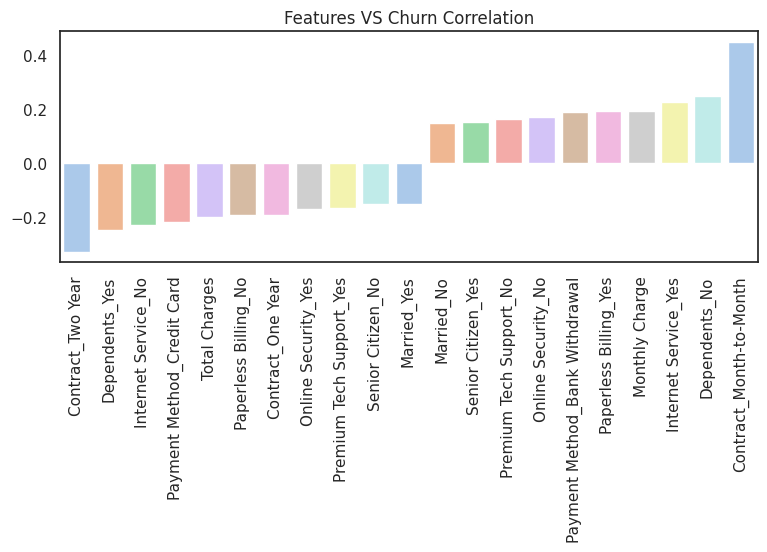

In [91]:
# Create again the correlation matrix with a clean df
clean_corr_yes_churn = features_df.corr()['Churn Value'].sort_values().iloc[:-1]

plt.figure(figsize=(9,3))
colors = sns.color_palette('pastel')
sns.barplot(x=clean_corr_yes_churn.index,y=clean_corr_yes_churn.values, palette = colors)
plt.xticks(rotation=90)
plt.title("Features VS Churn Correlation");

**Features that correlates positively   with the Churn Value:**
1. Month to month contract (initially lower motivation and they have a decision moment every month to stay or to leave, maybe we should analyse them separately)
2. No Dependents, not married (maybe more likely to move)
3. Internet service (maybe a lot of competitors or a problem with the service)
4. No online security and Premium tech support (if this services are our competitor advantages, maybe we should make the value of using  them more visible)
5. Bank withdrawals as the Payment method
6. Senior citizens
7. Monthly charge 
8. Paperless billing

**Features that correlates positively   with the Churn Value:** 
1. Contract one and two years (maybe we should promote this type of contract and give a discount for switching to one year/two years contract)
2. People are married and with dependants (maybe we should target more on that category)
3. Payment method: Credit card
4. Online Security
5. Non-senior citizens
6. Premium tech support
7. Paper billing

Let's have a look if the features correlate with each other.

Text(0.5, 1.0, 'Features Correlation with each other')

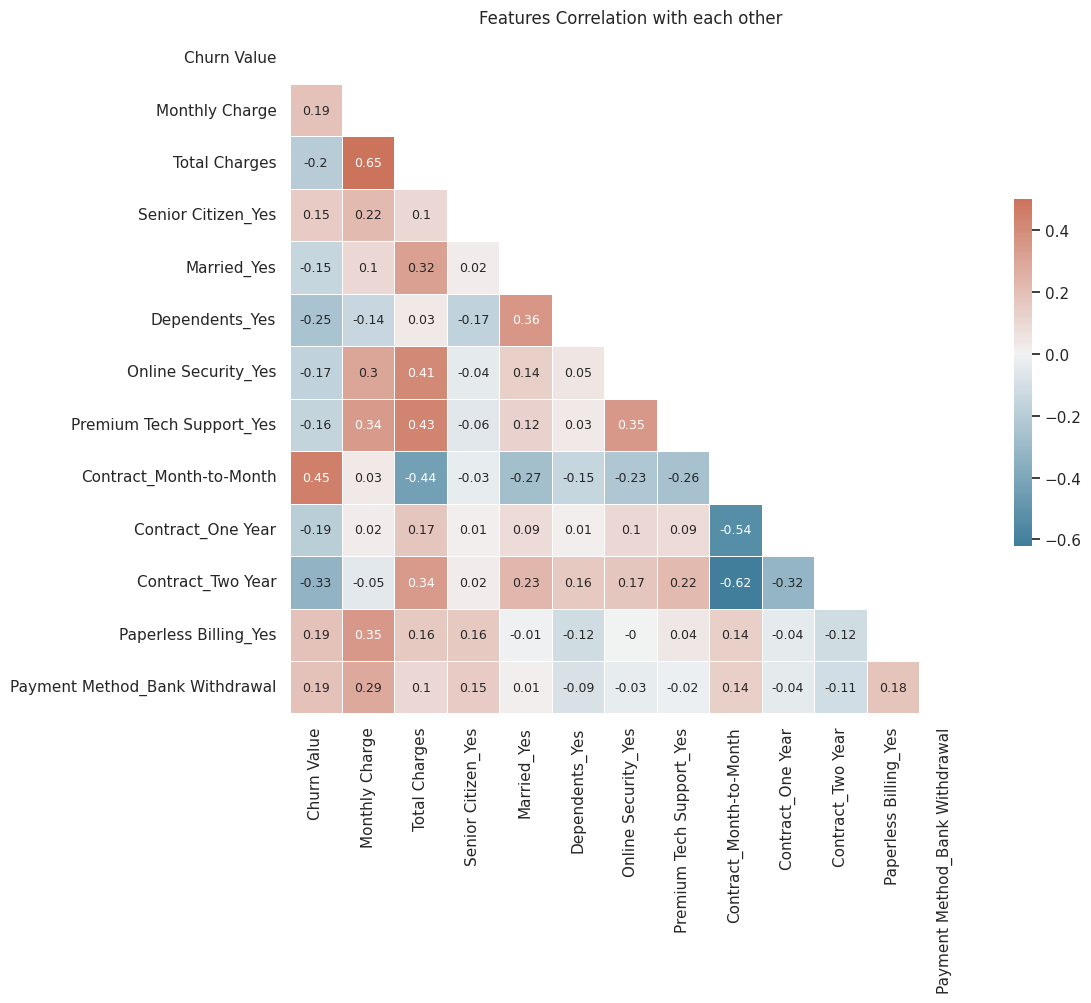

In [96]:
# Correlation matrix
sns.set_theme(style="white")
corrmat = features_df.corr().round(decimals = 2)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, annot = True,annot_kws={"size": 9}, vmax=.5, center = 0, square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title("Features Correlation with each other")

Our new data set has only features with correlation > |0.1| with our target variable. But we still have the variables that mirror each other (i.e. 'Paperless Billing _ No' and 'Paperless Billing _ Yes'). They have a strong correlation with each other.

'Monthly charge' correlate with the 'Internet service'. So it is better to use only one of that variables in the modeling. Mothly charges contain more information than the usage of Internet Service. So Let's keep the 'Monthly Charge' variable.

In [93]:
# Let's drop the useless features
features_df = features_df.drop(['Internet Service_Yes', 'Internet Service_No', 'Senior Citizen_No', 'Married_No', 'Dependents_No', 'Internet Service_No', 'Online Security_No', 'Premium Tech Support_No','Paperless Billing_No', 'Payment Method_Credit Card'], axis = 1)

# Customer segments Analysis

Our customers have different tenure in months (i.e., the number of months since product's introduction). So to understand better the churn rate we can segment the customers.

<Axes: title={'center': 'Churn rate VS Tenure in Months'}, xlabel='Tenure in Months'>

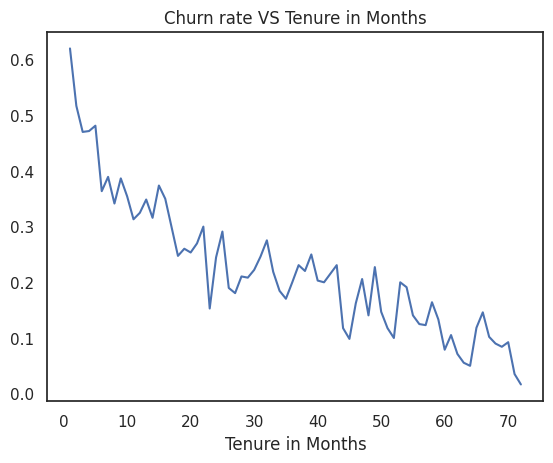

In [95]:
#Let's have a look of % who churned vs tenure in months
churn_vs_tenure = df.groupby(['Churn Value', 'Tenure in Months']).count().transpose()[1]
not_churn_vs_tenure = df.groupby(['Churn Value', 'Tenure in Months']).count().transpose()[0]

churn_rate_vs_tenure = churn_vs_tenure/(churn_vs_tenure+not_churn_vs_tenure)
churn_rate_vs_tenure.transpose()['Customer ID'].plot(title='Churn rate VS Tenure in Months')

**There are too many tenure groups. Let's divide them into 6 cohorts:** 
1. 0-12 months
2. 13-24 months
3. 25-36 months
4. 37-48 months
5. 49-60 months
6. 61 + months.

In [97]:
# A new column with the cohorts
df["Tenure Cohorts"]=pd.cut(df["Tenure in Months"],bins=[0,12,24,36,48,60,float("inf")],labels=['0-12 months','13-24 months','25-36 months' ,'37-48 months','49-60 months', '61-72 months'])

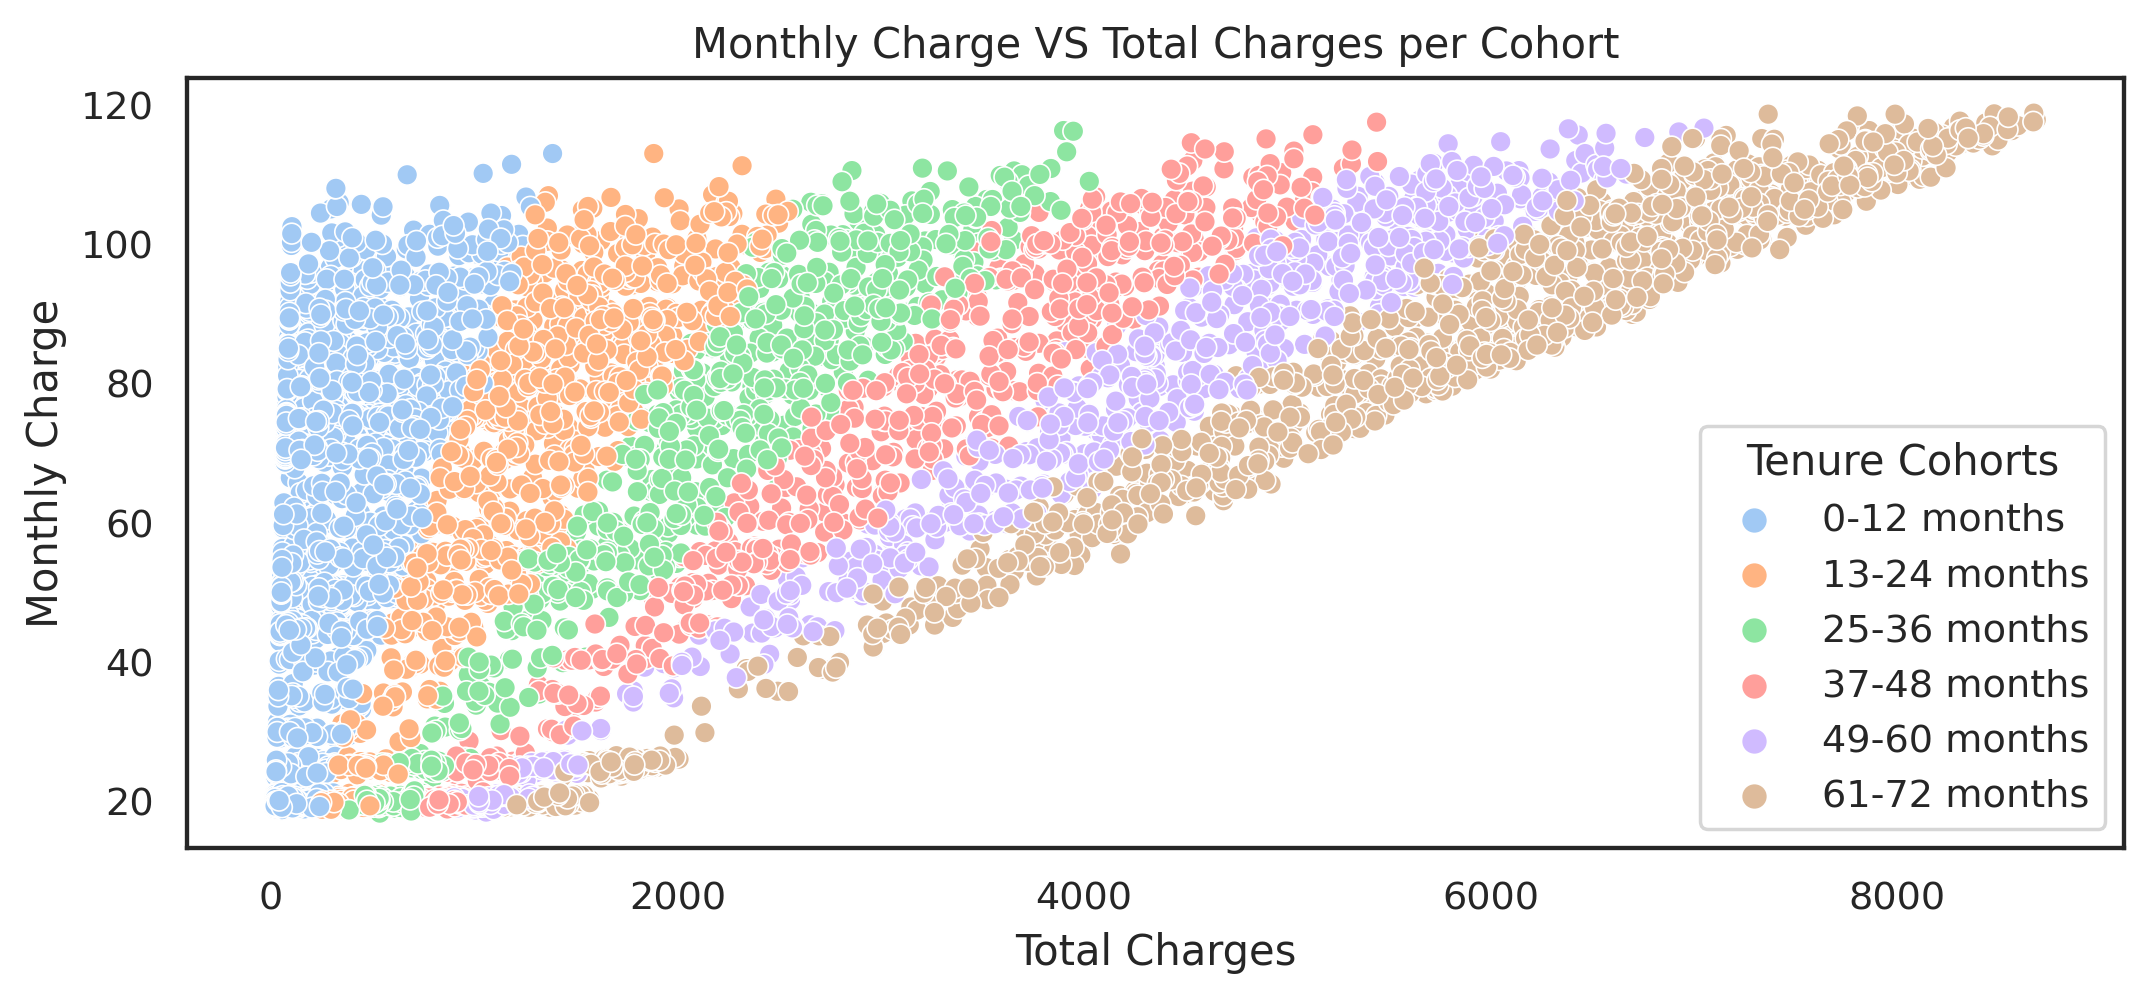

In [100]:
# Monthly charges vs Total charges per cohort
plt.figure(figsize = (10,4), dpi = 250)
sns.scatterplot(data=df, x = 'Total Charges', y = 'Monthly Charge', hue = 'Tenure Cohorts', palette = 'pastel');
plt.title("Monthly Charge VS Total Charges per Cohort");

From a plot above we see that the Monthly charge is higher for customers that were indroduced to our product  61-72 months ago comparing with those who are with us last 2 years.

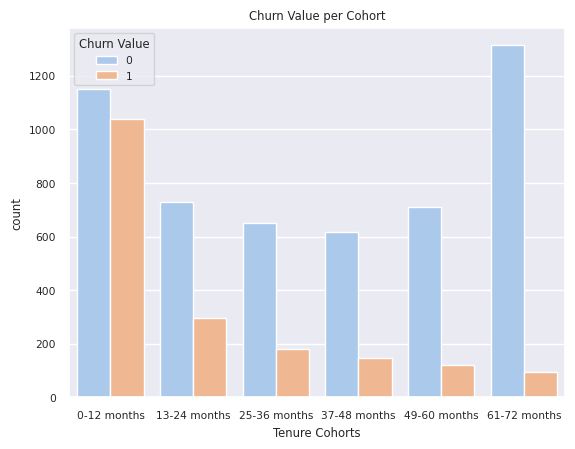

In [102]:
sns.set(font_scale=0.7)
sns.countplot(data=df, x = 'Tenure Cohorts', hue = 'Churn Value', palette = 'pastel')
plt.title("Churn Value per Cohort");

We see that people who joined us more than 1 year ago are less likely to churn. And customers who joined 0-12 month ago are very likely to churn.

We have seen that there are 3 types of contract and the churn rate is different for each of them. Let's have a look on them using cohorts. 

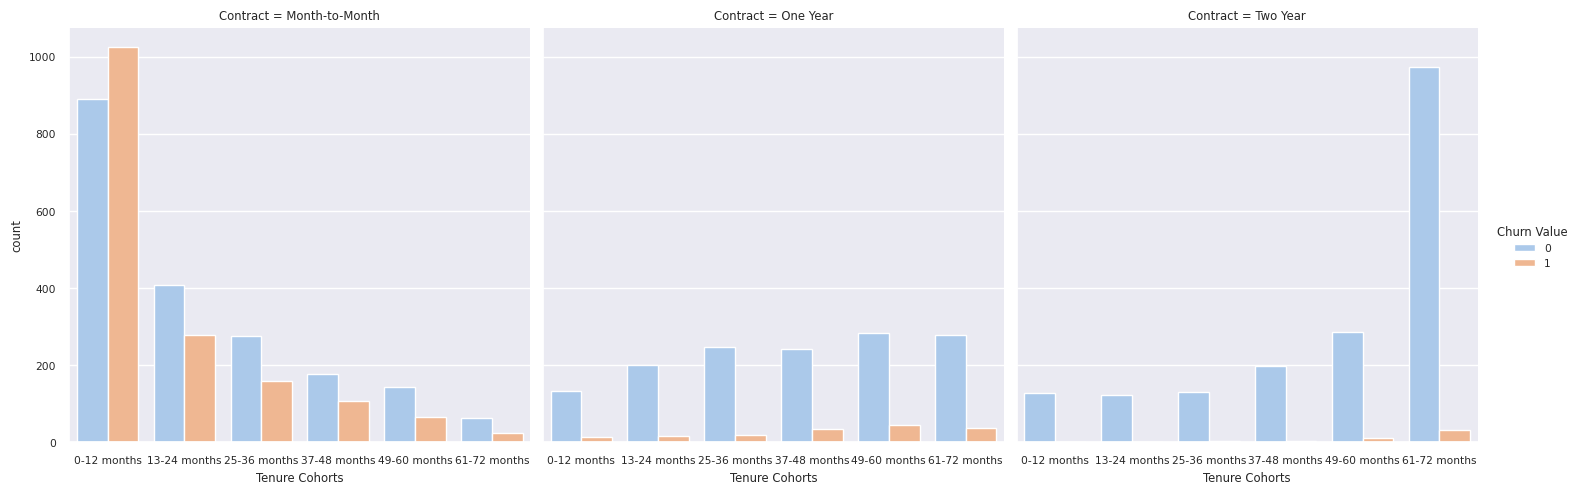

In [104]:
sns.catplot(data=df, x = 'Tenure Cohorts', hue = 'Churn Value', kind = 'count', col = 'Contract', palette = 'pastel')

Even with cohorts we see that customers with a Month to Month contract are more likely to churn. We remember that this type of contract relates positively with the Churn value. For One and Two years contract counts for those who Churn  is relatively low.  Maybe it makes sense to build a separate model for the most churning segment. Further we will reconsider the data set and work only with Month-to-Month customers as the most interesting segment in terms of Churn.

 

We decided to analyse closer the segment with a Month-to-Month contract. So let's cut the data set and check the balance of the target variavle.

In [105]:
# Create a new data set with only Month-to-Month contract owners
m_to_m_df = features_df[features_df["Contract_Month-to-Month"] == 1]

# Check if "Contract_Month-to-Month" has only '1' value
print(m_to_m_df["Contract_Month-to-Month"].unique())

[1]


Text(0.5, 1.0, 'Churn Value')

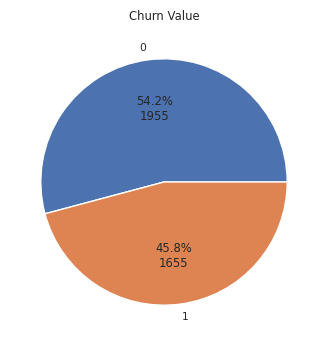

In [107]:
# The ratio of '0' and '1' answers for the target variable in the new data set
total_1 = m_to_m_df['Churn Value'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total_1*x/100)

plt.figure(figsize=(10,4),dpi=100)
plt.pie(m_to_m_df['Churn Value'].value_counts().values, labels=m_to_m_df['Churn Value'].value_counts().index, autopct=fmt)
plt.title('Churn Value')

We considered that our extreme balance ratio is 80/20. As we see, our target variable is almost in perfect balance: 54.2% & 45.8%. So we can split our data to train and test sets.

# Model Selection

Since our target variable has 2 categories:  '0' for 'Did NOT churn' and '1' for 'Yes, Churned', we can use classification models such as A single decision tree, Random Forest and Boosting methods as well as a Logistic regression.
For the train X features set we don't need 'Churn Value', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year' variables.

For each model we will do following steps:
1. Train a model
2. Evaluate perfomance
3. Create the confusion matrix

For the final model we will apply the validation with stratification.

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churn Value                     7043 non-null   int64  
 1   Monthly Charge                  7043 non-null   float64
 2   Total Charges                   7043 non-null   float64
 3   Senior Citizen_Yes              7043 non-null   uint8  
 4   Married_Yes                     7043 non-null   uint8  
 5   Dependents_Yes                  7043 non-null   uint8  
 6   Online Security_Yes             7043 non-null   uint8  
 7   Premium Tech Support_Yes        7043 non-null   uint8  
 8   Contract_Month-to-Month         7043 non-null   uint8  
 9   Contract_One Year               7043 non-null   uint8  
 10  Contract_Two Year               7043 non-null   uint8  
 11  Paperless Billing_Yes           7043 non-null   uint8  
 12  Payment Method_Bank Withdrawal  70

In [111]:
# Let's drop the vars to prepare the train set
X = m_to_m_df.drop(['Churn Value', 'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year'], axis = 1)

# Our target variable
y = m_to_m_df['Churn Value']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.69      0.75      0.71       365
           1       0.71      0.65      0.68       357

    accuracy                           0.70       722
   macro avg       0.70      0.70      0.70       722
weighted avg       0.70      0.70      0.70       722



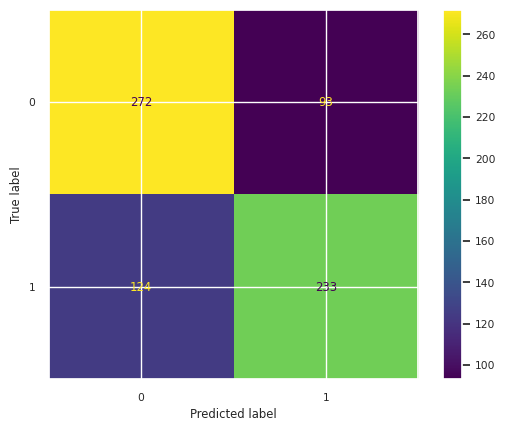

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lg_model = LogisticRegression(random_state = 42)
lg_model.fit(X_train, y_train)
lg_preds=lg_model.predict(X_test)
print(classification_report(y_test, lg_preds))
cm = confusion_matrix(y_test, lg_preds, labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_model.classes_)
disp.plot()
plt.show()

Accuracy = 0.70, f1-score for '0' values = 0.71, f1-score for '1' values = 0.68. A model predicts better those who didn't churn (f1-score for '0' > f1-score for '1' values). Also we have 124 customers who churned, but the model didn't detect them.

## Decision Tree model

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
# Which max depth is better?
max_depth_list = [1,2,3,4,6,7,8,9]

for x in max_depth_list:
    dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42,max_depth=x) 
    dtc.fit(X_train,y_train)
    preds = dtc.predict(X_test)
    print(x, classification_report(y_test,preds))

1               precision    recall  f1-score   support

           0       0.58      0.94      0.72       365
           1       0.84      0.31      0.45       357

    accuracy                           0.63       722
   macro avg       0.71      0.63      0.59       722
weighted avg       0.71      0.63      0.59       722

2               precision    recall  f1-score   support

           0       0.58      0.94      0.72       365
           1       0.84      0.31      0.45       357

    accuracy                           0.63       722
   macro avg       0.71      0.63      0.59       722
weighted avg       0.71      0.63      0.59       722

3               precision    recall  f1-score   support

           0       0.69      0.63      0.66       365
           1       0.65      0.71      0.68       357

    accuracy                           0.67       722
   macro avg       0.67      0.67      0.67       722
weighted avg       0.67      0.67      0.67       722

4            

After max_depth=6 the f1-score and accuracy become lower. Accuracy = 0.70, f1-score = 0.71 for Churn Value '0' and f1-score = 0.68 for  Churn Value '1'. Results are the same as the Logistic Regression model.To understand a model better let's plot the confusion matrix.

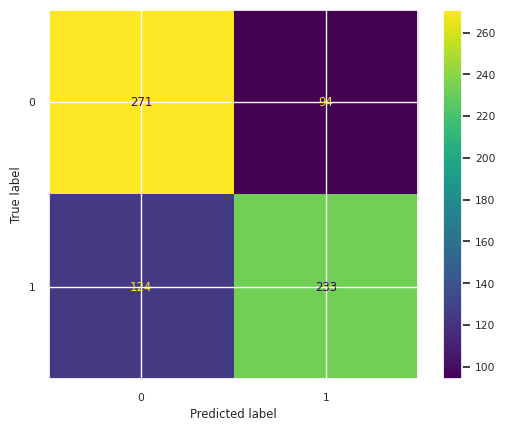

In [129]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth=7)
dtc.fit(X_train,y_train)
preds = dtc.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()

A model tend to predict that customers will not churn (Predicted:0) when actually they churn (True:1). This type of mistake (False Negatives) is dangerous as we can lose 124 customers.

## Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
max_depth_list = [1,2,3,4,6,7,8]

for x in max_depth_list:
    rmf = RandomForestClassifier(n_estimators=100,random_state = 42, max_depth=x)
    rmf.fit(X_train,y_train)
    preds = rmf.predict(X_test)
    print(x, classification_report(y_test,preds))

1               precision    recall  f1-score   support

           0       0.58      0.94      0.72       365
           1       0.84      0.31      0.45       357

    accuracy                           0.63       722
   macro avg       0.71      0.63      0.59       722
weighted avg       0.71      0.63      0.59       722

2               precision    recall  f1-score   support

           0       0.67      0.83      0.74       365
           1       0.77      0.59      0.67       357

    accuracy                           0.71       722
   macro avg       0.72      0.71      0.70       722
weighted avg       0.72      0.71      0.70       722

3               precision    recall  f1-score   support

           0       0.68      0.77      0.72       365
           1       0.73      0.63      0.68       357

    accuracy                           0.70       722
   macro avg       0.71      0.70      0.70       722
weighted avg       0.71      0.70      0.70       722

4            

With max_depth=8 the f1-score = 0.73 for Churn Value '0' and 0.70 for Churn Value '1' and Accuracy = 0.72. This model still predicts better those who didn't churn. But it also works better for those who churned. Let's plot the confusion matrix.

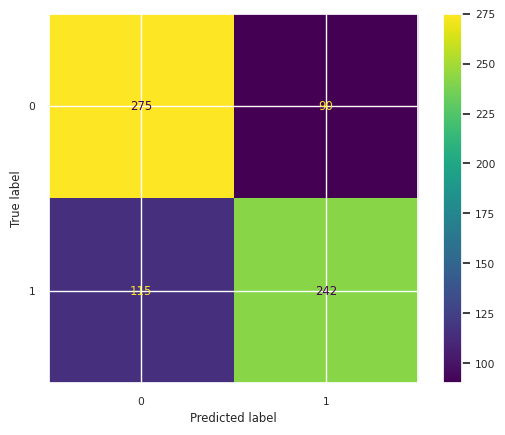

In [133]:
rmf = RandomForestClassifier(max_depth=8, random_state=42)
rmf.fit(X_train, y_train)
preds_rmf = rmf.predict(X_test)
cm = confusion_matrix(y_test, preds_rmf, labels=rmf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rmf.classes_)
disp.plot()
plt.show()

With this model potentially we lose 115 customers vs 124 in the Decision Tree model. It's getting better.

## Boosted Trees

### Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
max_depth_list = [1,2,3,4]

for x in max_depth_list:
    gb_model = GradientBoostingClassifier(random_state=42,max_depth=x)
    gb_model.fit(X_train, y_train)
    gb_preds=gb_model.predict(X_test)
    print(x,classification_report(y_test, gb_preds))

1               precision    recall  f1-score   support

           0       0.70      0.80      0.74       365
           1       0.76      0.64      0.70       357

    accuracy                           0.72       722
   macro avg       0.73      0.72      0.72       722
weighted avg       0.73      0.72      0.72       722

2               precision    recall  f1-score   support

           0       0.71      0.78      0.74       365
           1       0.75      0.68      0.71       357

    accuracy                           0.73       722
   macro avg       0.73      0.73      0.73       722
weighted avg       0.73      0.73      0.73       722

3               precision    recall  f1-score   support

           0       0.70      0.77      0.73       365
           1       0.74      0.67      0.70       357

    accuracy                           0.72       722
   macro avg       0.72      0.72      0.72       722
weighted avg       0.72      0.72      0.72       722

4            

With max_depth=2 the f1-score = 0.74 for Churn Value '0' and 0.71 for Churn Value '1' and accuracy = 0.73. This model still predicts better those who didn't churn. But it also works better for those who churned. Let's plot the confusion matrix.

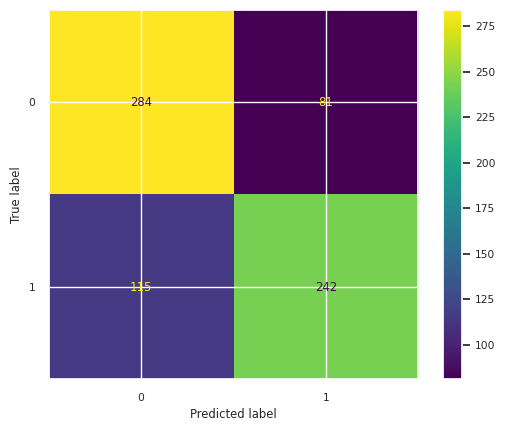

In [137]:
gb = GradientBoostingClassifier(random_state=42,max_depth=2)
gb.fit(X_train, y_train)
preds_gb = gb.predict(X_test)
cm = confusion_matrix(y_test, preds_gb, labels=gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot()
plt.show()

With this model potentially we lose 115 customers the same number as in the Random Forest model. Our recalls are slightly better. Let's try the XGBoost and play with its hyperparameters.

### XG Boost

In [138]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import xgboost as xgb

In [140]:
# Explore the best max depth
max_depth_list = [1,2,3,4]

for x in max_depth_list:
    xgb_model = xgb.XGBClassifier(random_state = 42, max_depth=x)
    xgb_model.fit(X_train, y_train)
    xgb_preds=xgb_model.predict(X_test)
    print(x,classification_report(y_test, xgb_preds))

1               precision    recall  f1-score   support

           0       0.71      0.76      0.73       365
           1       0.73      0.68      0.71       357

    accuracy                           0.72       722
   macro avg       0.72      0.72      0.72       722
weighted avg       0.72      0.72      0.72       722

2               precision    recall  f1-score   support

           0       0.71      0.78      0.74       365
           1       0.75      0.68      0.71       357

    accuracy                           0.73       722
   macro avg       0.73      0.73      0.73       722
weighted avg       0.73      0.73      0.73       722

3               precision    recall  f1-score   support

           0       0.72      0.76      0.74       365
           1       0.74      0.69      0.71       357

    accuracy                           0.73       722
   macro avg       0.73      0.73      0.73       722
weighted avg       0.73      0.73      0.73       722

4            

Max_depth = 2 seems to perform the best for us. With this model we can refine other hyperparameters.

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       365
           1       0.74      0.70      0.72       357

    accuracy                           0.73       722
   macro avg       0.73      0.73      0.73       722
weighted avg       0.73      0.73      0.73       722



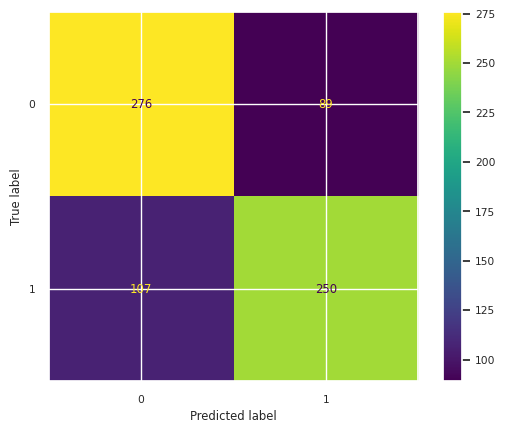

In [141]:
# Let's try to change the n_estimators and learning_rate hyperparameters
xgb_model = xgb.XGBClassifier(n_estimators = 100, max_depth=2,  learning_rate = 0.9, random_state = 42 )
xgb_model.fit(X_train, y_train)
xgb_preds=xgb_model.predict(X_test)
print(classification_report(y_test, xgb_preds))
cm = confusion_matrix(y_test, xgb_preds, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot()
plt.show()

This model perfoms better than others with it's accuracy = 0.73, and better F-1 and recall scores. Potentially we can lose 107 customers vs 115 in the previously best performing Random Forest model.

### Validation with stratified KFold

Let's try to do validation with stratification and have a look at the min, mean and max accuracy.

In [142]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean

fold_model = xgb.XGBClassifier(n_estimators = 100, max_depth=2,  learning_rate = 0.9, random_state = 42 )
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 
lst_accu_stratified = []


In [143]:
for train_index, test_index in skf.split(X, y): 
    
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    fold_model.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(fold_model.score(X_test_fold, y_test_fold))

In [144]:
print('Maximum Accuracy',max(lst_accu_stratified).round(decimals=2)) 
print('Minimum Accuracy:',min(lst_accu_stratified).round(decimals=2)) 
print('Overall Accuracy:',mean(lst_accu_stratified).round(decimals=2))

Maximum Accuracy 0.74
Minimum Accuracy: 0.71
Overall Accuracy: 0.72


The minimum accuracy is 0.71. This result is almost the same as we got with other models. 

### Features importance

Let's have a look at features importance. For that we will use the permutation method. "This permutation method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.
 The permutation based method can have problem with highly-correlated features."
 
Source: https://mljar.com/blog/feature-importance-xgboost/

In [145]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'Permutation Importance')

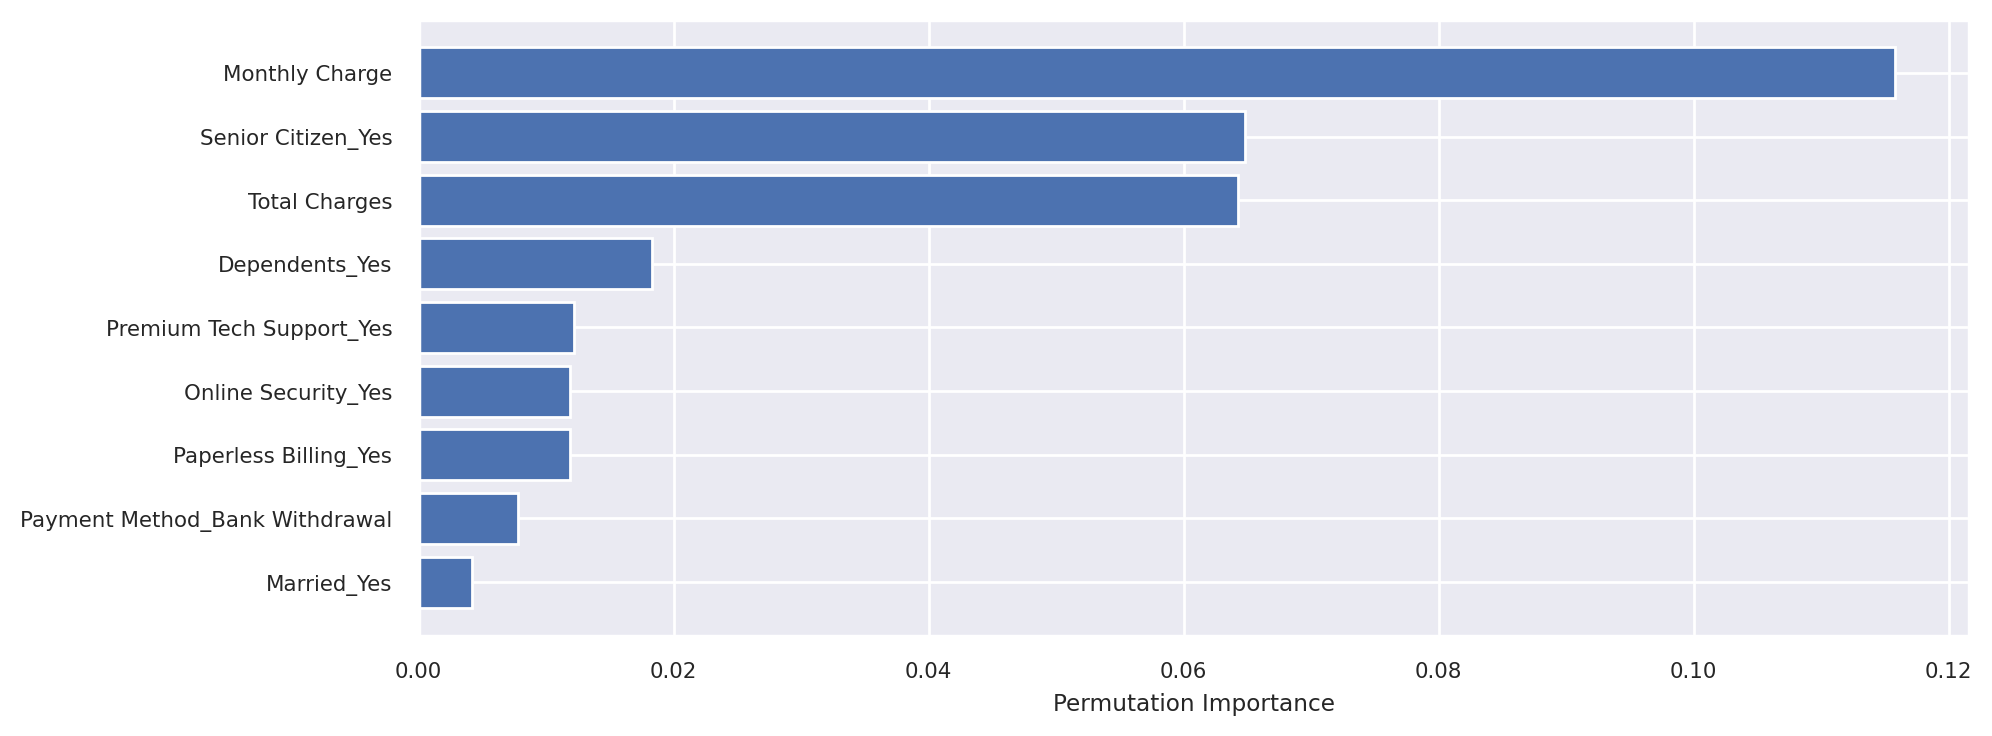

In [146]:
plt.figure(figsize=(10,4),dpi=200)
perm_importance = permutation_importance(xgb_model, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

We see that the most important features are the Monthly and Total Charges, Senior citizens, if a Customer has Dependents and additional Services such as Premium Tech Support and Online Security.

# Conclusions

**Data set**

* The data set has an imbalanced target variable 'Churn Value'. We got rid of it when focused only on Month-To-Month Contract owners. It is important to resample the data set working with other segments.

**Customer Segments**

* We found out that a segment that churning the most is the 'Month-to_Month Contract' owners for different cohorts.
* 'Senior_Citizen_Yes' also an important feature that correlates positively with the 'Churn Value'. We can have a closer look at this category. What is the reason of churning? Death or switching to competitors? What is their LTV? Should we make efforts to keep them?
* 'Dependants_Yes' correlates negatively with the 'Churn Value'. Maybe we should consider them as a potential growth opportunity and create relevant promotions?

**Features**

* 'Monthly charge' is an important feature that positively correlates with the Churn Value. We can think about converting 'Month-to_Month Contract' owners to 'One year Contract' owners using price promotions.

**Models**

* Our goal was to minimize the type II error (False Negatives) because it is a group of customers that we can miss and lose them. Also we tried to maximize the accuracy and f-1 score.
* After tweaking some hyperparameters, the XGBoost model seems to be the best for us.